In [2]:
library(mgsub)
library(gghalves)
library(reshape2)
library(tidyverse)
library(RColorBrewer)
library(boot)
library(lsa) #cosine
library(gghalves) 

In [3]:
lowerTriangle <- function(m){
  return(m[lower.tri(m)])
}

cosine_matrix = function(raw_data){
    # rel*rel matrix caculated by cosine similarity
    n <- nrow(raw_data)  # raw_data is an n x n matrix, 159*dimensions
    # create an empty matrix to store cosine similarity
    raw_data_cor <- matrix(0, nrow = n, ncol = n)
    colnames(raw_data_cor) <- rownames(raw_data)
    rownames(raw_data_cor) <- rownames(raw_data)
    # calculate the cosine similarity of the upper triangular part
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            cosine_value <- cosine(as.numeric(raw_data[i, ]), as.numeric(raw_data[j, ]))
            raw_data_cor[i, j] <- cosine_value
        }
    }
    # symmetrically fill the cosine similarity in the lower triangular part
    raw_data_cor <- raw_data_cor + t(raw_data_cor)

    # set the diagonal to 1
    diag(raw_data_cor) <- 1
    return(raw_data_cor)
}

# 15 theoretical models + FAVEE

In [4]:
#define the model name
models <- c('Wish_1976_model','Triandis_1968_model','Marwell_1970_model',
            'Osgood_1957_model','Fiske_1992_model','Clark_2011_model','Carpendale_2004_model',
            'Foa_2012_model','Bugental_2000_model','Goffman_1959_model','Hamilton_1981_model',
            'Burton_1975_model','Montgomery_1988_model','Rands_1979_model','Weiss_1998_model',
            'FAVEE_model')

# define the model
FAVEE_model <- c("Formality.and.Regulation","Activeness","Valence.Evaluation","Goods.Exchange","Equality")
Wish_1976_model <- c("Formality.and.Regulation","Equality","Valence.Evaluation","Activity.Intensity")
Triandis_1968_model <- c("Valence.Evaluation","Equality","Intimacy") 
Marwell_1970_model <- c("Visibility","Formality.and.Regulation","Intimacy")
Osgood_1957_model <- c("Valence.Evaluation","Equality","Activity.Intensity")
Fiske_1992_model <- c("Communal.Sharing","Equality","Strategic","Expected.Reciprocity")
Clark_2011_model <- c("Communal.Sharing","Strategic","Expected.Reciprocity")
Carpendale_2004_model <- c("Importance.for.individuals","Importance.for.society")
Foa_2012_model <- c("Concreteness","Uniqueness")
Bugental_2000_model <- c("Attachment","Affiliation.Coalition","Mating","Expected.Reciprocity","Equality")
Goffman_1959_model <- c("Valence.Evaluation","Affiliation.Coalition","Conflict","Negotiation","Coercion")
Hamilton_1981_model <- c("Valence.Evaluation","Equality")
Burton_1975_model <- c("Valence.Evaluation","Equality","Occupational")
Montgomery_1988_model <- c("Valence.Evaluation","Equality","Intimacy") 
Rands_1979_model <- c("Formality.and.Regulation","Socioemotional")
Weiss_1998_model <- c("Attachment","Affiliation.Coalition")

length(models)

[1] 16

In [6]:
human_258r_33d = read.csv('human_rating_data/study2_modern/CHN_dim_rel_NLP_258r_33d_scaled_chi.csv',
                      row.names=1)
rels_order = row.names(human_258r_33d)
predict_33d = human_258r_33d 
dim(predict_33d)
model_sim_array = data.frame(matrix(nrow=33153,ncol=16))
colnames(model_sim_array) = models
model_sim_dict = list()
for (model_name in models) {
    model_vector <- get(model_name) 
    model_sim = cosine_matrix(predict_33d[,model_vector]) 
    model_sim_dict[[model_name]] = model_sim 
    model_sim_array[model_name] = lowerTriangle(model_sim)
}

[1] 258  33

# Targeted RDM

## modern bert

In [7]:
csim_modern=read.csv('sim_bert_embedding/modern/q3.1_bert_embedding_data/MASK_embedding_output.csv',
                   check.names=FALSE,row.names=1)
rels_order = rownames(csim_modern)
csim_modern = lowerTriangle(csim_modern)

predict_33d = human_258r_33d[rels_order,]
dim(predict_33d)
model_sim_array = data.frame(matrix(nrow=33153,ncol=16))
colnames(model_sim_array) = models
model_sim_dict = list()
for (model_name in models) {
    model_vector <- get(model_name) 
    model_sim = cosine_matrix(predict_33d[,model_vector]) 
    model_sim_dict[[model_name]] = model_sim 
    model_sim_array[model_name] = lowerTriangle(model_sim)
}
bertm.result.cor = data.frame(cor(cbind(model_sim_array,csim_modern)))

[1] 258  33

In [8]:
bert_modern_cor = bertm.result.cor %>% select(csim_modern) 
bert_modern_cor %>% arrange(desc(csim_modern))

,csim_modern
,<dbl>
csim_modern,1.0000000
FAVEE_model,0.5162148
Wish_1976_model,0.5142495
Marwell_1970_model,0.4941050
Burton_1975_model,0.4790298
Bugental_2000_model,0.4516134
Fiske_1992_model,0.4435936
Triandis_1968_model,0.4186917
Montgomery_1988_model,0.4186917


## ancient bert

In [9]:
csim_ancient=read.csv('sim_bert_embedding/ancient/q3.2_bert_embedding_data/MASK_embedding_output.csv',
                   check.names=FALSE,row.names=1)
rels_order_ancient = rownames(csim_ancient)
csim_ancient = lowerTriangle(csim_ancient)

predict_33d = human_258r_33d[rels_order_ancient,]
dim(predict_33d)
model_sim_array = data.frame(matrix(nrow=7140,ncol=16))
colnames(model_sim_array) = models
model_sim_dict = list()
for (model_name in models) {
    model_vector <- get(model_name) 
    model_sim = cosine_matrix(predict_33d[,model_vector]) 
    model_sim_dict[[model_name]] = model_sim 
    model_sim_array[model_name] = lowerTriangle(model_sim)
}
berta.result.cor = data.frame(cor(cbind(model_sim_array,csim_ancient)))

[1] 120  33

In [10]:
bert_ancient_cor = berta.result.cor %>% select(csim_ancient) 
bert_ancient_cor %>% arrange(desc(csim_ancient))

,csim_ancient
,<dbl>
csim_ancient,1.0000000
FAVEE_model,0.4166957
Wish_1976_model,0.4005847
Marwell_1970_model,0.3950908
Bugental_2000_model,0.3794882
Triandis_1968_model,0.3691541
Montgomery_1988_model,0.3691541
Fiske_1992_model,0.3487931
Clark_2011_model,0.3219329


In [12]:
rsa_cor = cbind(bert_modern_cor,bert_ancient_cor)
colnames(rsa_cor) = c('modern','ancient')
rsa_cor = rsa_cor[-c(17),]
rsa_cor

,modern,ancient
,<dbl>,<dbl>
Wish_1976_model,0.5142495,0.4005847
Triandis_1968_model,0.4186917,0.3691541
Marwell_1970_model,0.4941050,0.3950908
Osgood_1957_model,0.3861218,0.3060043
Fiske_1992_model,0.4435936,0.3487931
Clark_2011_model,0.3866149,0.3219329
Carpendale_2004_model,0.2290752,0.1843357
Foa_2012_model,0.2674150,0.2376243
Bugental_2000_model,0.4516134,0.3794882


In [13]:
write.csv(rsa_cor,'human_bert_cor/model_compare_chn_results.csv')

In [14]:
rsa_cor_plot = rsa_cor
rsa_cor_plot['model'] = rownames(rsa_cor_plot)
rsa_cor_melt = melt(rsa_cor_plot,id.vars = 'model')
rsa_cor_melt$'variable' = factor(rsa_cor_melt$'variable', levels=c('ancient','modern'))
head(rsa_cor_melt) 

,model,variable,value
,<chr>,<fct>,<dbl>
1,Wish_1976_model,modern,0.5142495
2,Triandis_1968_model,modern,0.4186917
3,Marwell_1970_model,modern,0.4941050
4,Osgood_1957_model,modern,0.3861218
5,Fiske_1992_model,modern,0.4435936
6,Clark_2011_model,modern,0.3866149


# Null distribution

In [15]:
human_rating = human_258r_33d
human_rating_outModel <- human_rating[, -which(colnames(human_rating) %in% FAVEE_model)]

## Modern BERT

### 5 dimensions

In [16]:
bertm_r_distri = c()

for(i in c(1:10000)){
    selected_columns <- sample(names(human_rating_outModel), 5)
    human_rating_selected <- human_rating_outModel[, selected_columns]
    human_distance_vector <- -c(dist(human_rating_selected))

    r <- as.numeric(cor.test(csim_modern, human_distance_vector, method = 'spearman')$estimate)
    bertm_r_distri <- c(bertm_r_distri, r)
}

In [17]:
model_vector <- get('FAVEE_model') 
model_sim = cosine_matrix(human_258r_33d[,model_vector]) 
dim(model_sim)
FAVEE_single_dimension = lowerTriangle(model_sim)
r_value = cor.test(FAVEE_single_dimension,csim_modern, method = 'spearman')$estimate
r_value
sum(bertm_r_distri>r_value)/10000

[1] 258 258

rho 
0.4963939

[1] 0

## Ancient BERT

In [18]:
human_rating_outModel_ancient <- human_rating[rels_order_ancient, 
                            -which(colnames(human_rating) %in% FAVEE_model)]
dim(human_rating_outModel_ancient)

[1] 120  28

In [19]:
berta_r_distri = c()

for(i in c(1:10000)){
    selected_columns <- sample(names(human_rating_outModel_ancient), 5)
    human_rating_selected <- human_rating_outModel_ancient[, selected_columns]
    human_distance_vector <- -c(dist(human_rating_selected))

    r <- as.numeric(cor.test(csim_ancient, human_distance_vector, method = 'spearman')$estimate)
    berta_r_distri <- c(berta_r_distri, r)
}

In [20]:
model_vector <- get('FAVEE_model') 
model_sim = cosine_matrix(human_258r_33d[rels_order_ancient,model_vector]) 
dim(model_sim)
FAVEE_single_dimension = lowerTriangle(model_sim)
r_value = cor.test(FAVEE_single_dimension,csim_ancient, method = 'spearman')$estimate
r_value
sum(berta_r_distri>r_value)/10000

[1] 120 120

rho 
0.3946672

[1] 0.0058

# Plot results adding null distribution

In [23]:
my.color = c('modern'="#a17db4",'ancient'="#9DCD82",'FAVEE_model'='red')

null_distri = data.frame(modern = bertm_r_distri,
                         ancient = berta_r_distri)
null_distri_melt = melt(null_distri)
null_distri_melt$'variable' = factor(null_distri_melt$'variable',
                                     levels = c('ancient','modern'))
null_distri_melt = null_distri_melt[null_distri_melt$'variable'%in%c('ancient','modern'),] 
rsa_cor_melt = rsa_cor_melt[rsa_cor_melt$'variable'%in%c('ancient','modern'),]    

No id variables; using all as measure variables



Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


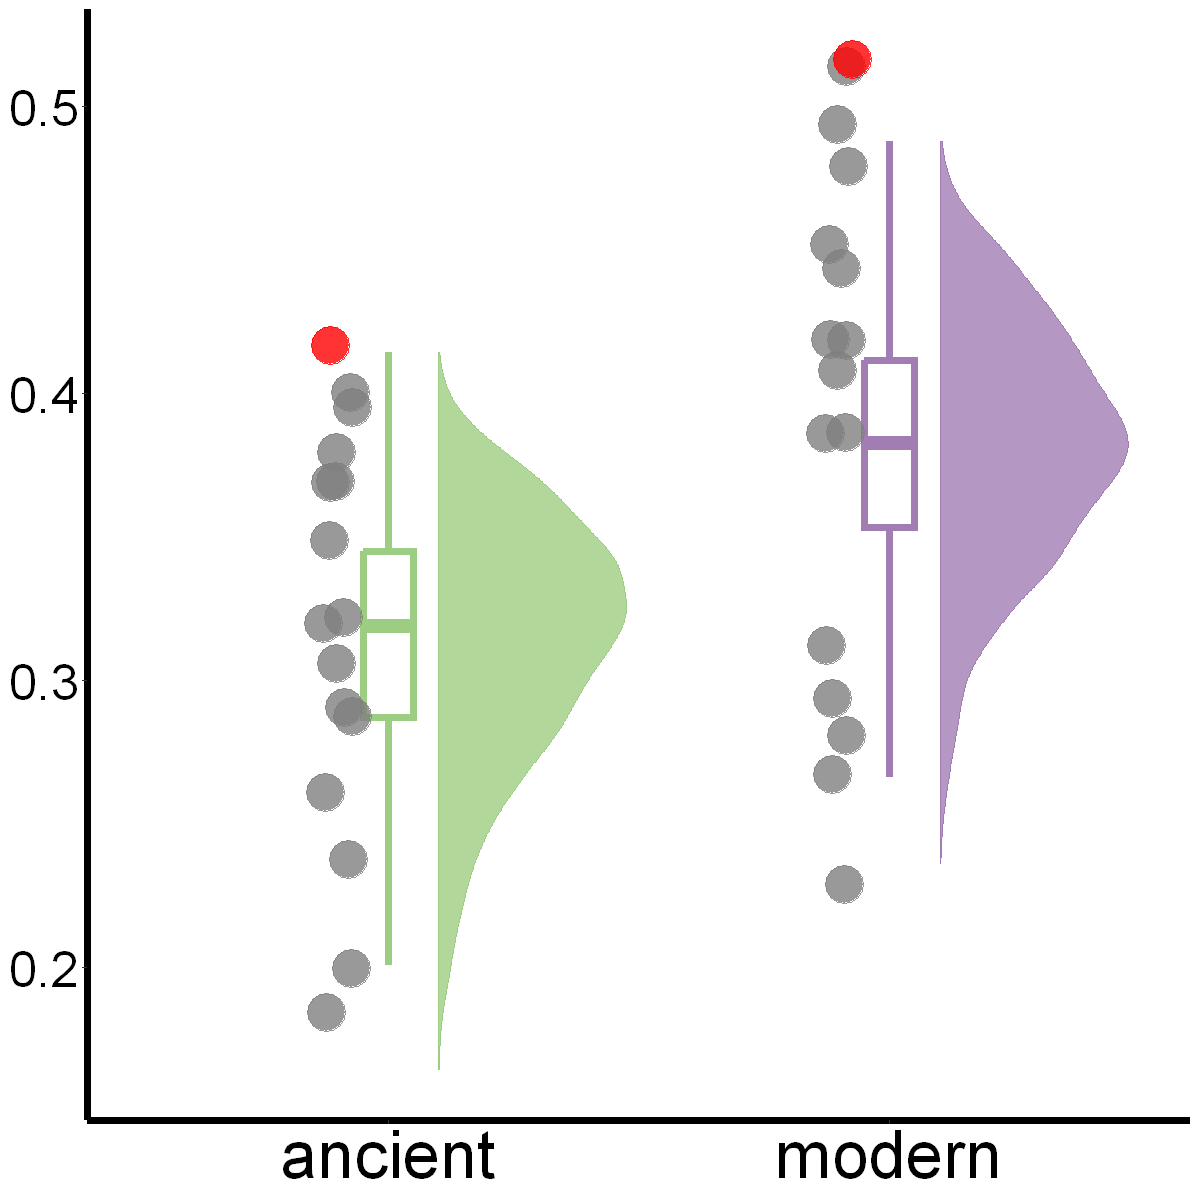

In [24]:
options(repr.plot.width = 10, repr.plot.height=10)
ggplot()+
    geom_half_violin(data = null_distri_melt,aes(x=variable, y=value,fill=variable,color=variable),
                     position=position_nudge(x=0.1,y=0),
                   side='R',adjust=1.2,trim=T,alpha=0.8) +
    geom_boxplot(data=null_distri_melt, aes(x=variable, y=value,color=variable),
                 linewidth = 2,
                 outlier.alpha = 0, width=0.1)+
    scale_color_manual(values=my.color)+
    scale_fill_manual(values=my.color)+
    geom_point(data=rsa_cor_melt, aes(x = as.numeric(variable)-0.1,
             y = value, color = model),
             position = position_jitter(width =0.03),size =16, 
             shape = 20,alpha=0.8)+
    #coord_flip()+
    theme_classic()+
    theme(axis.text.y = element_text(size=30,color="black"),
        axis.text.x = element_text(size=40,color="black"),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        axis.line = element_line(linetype=1,color="black",size=2),
        legend.position = 'none')

In [25]:
png("output_graph/model_compare.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)
options(repr.plot.width = 10, repr.plot.height=10)
ggplot()+
    geom_half_violin(data = null_distri_melt,aes(x=variable, y=value,fill=variable,color=variable),
                     position=position_nudge(x=0.1,y=0),
                   side='R',adjust=1.2,trim=T,alpha=0.8) +
    geom_boxplot(data=null_distri_melt, aes(x=variable, y=value,color=variable),
                 linewidth = 2,
                 outlier.alpha = 0, width=0.1)+
    scale_color_manual(values=my.color)+
    scale_fill_manual(values=my.color)+
    geom_point(data=rsa_cor_melt, aes(x = as.numeric(variable)-0.1,
             y = value, color = model),
             position = position_jitter(width =0.03),size =16, 
             shape = 20,alpha=0.8)+
    #coord_flip()+
    theme_classic()+
    theme(axis.text.y = element_text(size=30,color="black"),
        axis.text.x = element_text(size=40,color="black"),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        axis.line = element_line(linetype=1,color="black",size=2),
        legend.position = 'none')
dev.off()

png 
  2